In [1]:
#Write a program to compute the first-order gradients of an image in the x 
#and y directions using Sobel filters. Combine the gradients to visualize 
#edges.

Matplotlib is building the font cache; this may take a moment.


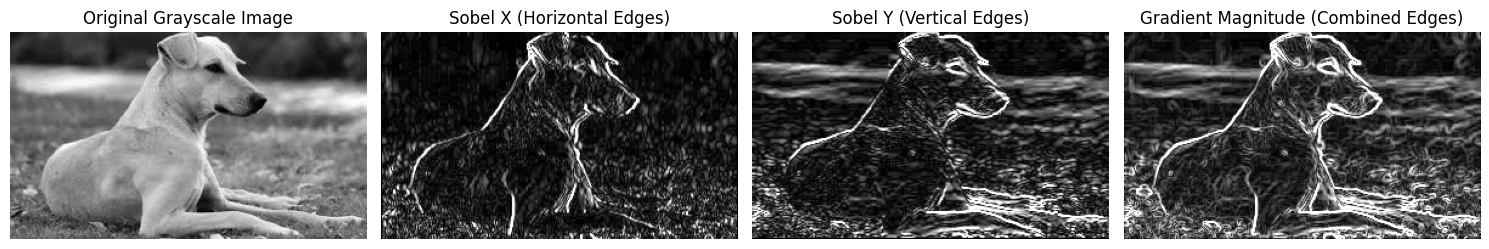

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "dog.jpg"
img_bgr = cv2.imread(image_path)

# Check if the image is loaded
if img_bgr is None:
    print("Error: Unable to load the image. Please check the path.")
else:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Compute gradients in x and y directions using Sobel filter
    sobel_x = cv2.Sobel(img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)  # Gradient in x
    sobel_y = cv2.Sobel(img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)  # Gradient in y

    # Combine gradients to visualize edges (gradient magnitude)
    gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

    # Normalize to an 8-bit image for visualization
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

    # Plot the original image, gradients, and combined edges
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(sobel_x, cmap='gray')
    plt.title("Sobel X (Horizontal Edges)")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(sobel_y, cmap='gray')
    plt.title("Sobel Y (Vertical Edges)")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title("Gradient Magnitude (Combined Edges)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [3]:
#Modify the program to include edge thresholding (e.g., keeping gradients 
#above a certain value). 

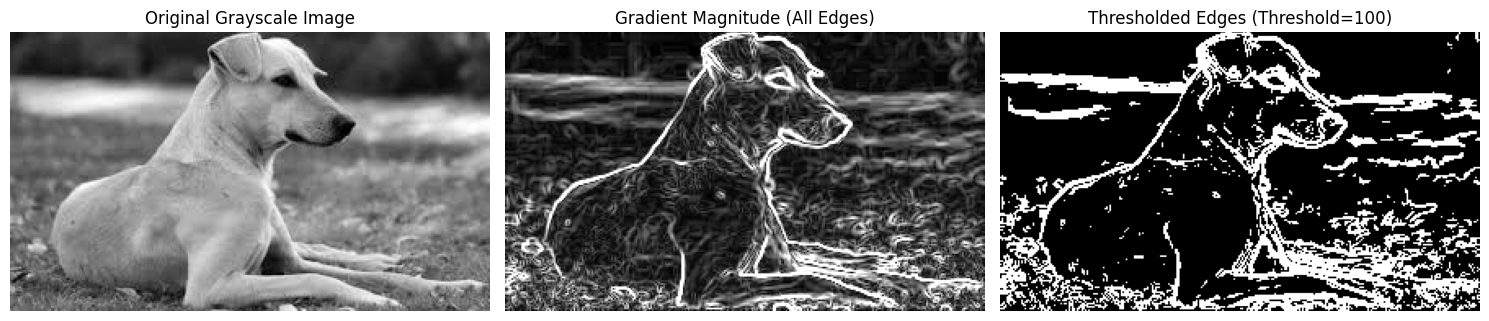

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "dog.jpg"
img_bgr = cv2.imread(image_path)

# Check if the image is loaded
if img_bgr is None:
    print("Error: Unable to load the image. Please check the path.")
else:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Compute gradients in x and y directions using Sobel filter
    sobel_x = cv2.Sobel(img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)  # Gradient in x
    sobel_y = cv2.Sobel(img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)  # Gradient in y

    # Combine gradients to visualize edges (gradient magnitude)
    gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

    # Normalize gradients to an 8-bit image
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

    # Apply thresholding to keep only strong edges
    threshold_value = 100  # Set the threshold value
    _, thresholded_edges = cv2.threshold(gradient_magnitude, threshold_value, 255, cv2.THRESH_BINARY)

    # Plot the original image, gradients, and thresholded edges
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title("Gradient Magnitude (All Edges)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(thresholded_edges, cmap='gray')
    plt.title(f"Thresholded Edges (Threshold={threshold_value})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [4]:
#Apply the Canny edge detection algorithm to an image and display the 
#output. 

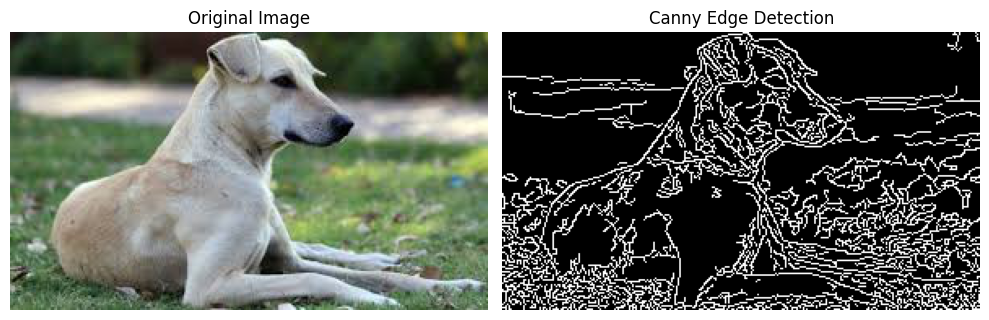

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "dog.jpg"
img_bgr = cv2.imread(image_path)

# Check if the image is loaded
if img_bgr is None:
    print("Error: Unable to load the image. Please check the path.")
else:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    # Parameters: lower_threshold, upper_threshold
    lower_threshold = 50
    upper_threshold = 150
    edges = cv2.Canny(img_gray, lower_threshold, upper_threshold)

    # Plot the original image and the edges
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [6]:
#Experiment with the low and high threshold parameters of the Canny 
#algorithm to observe their effects on edge detection. 

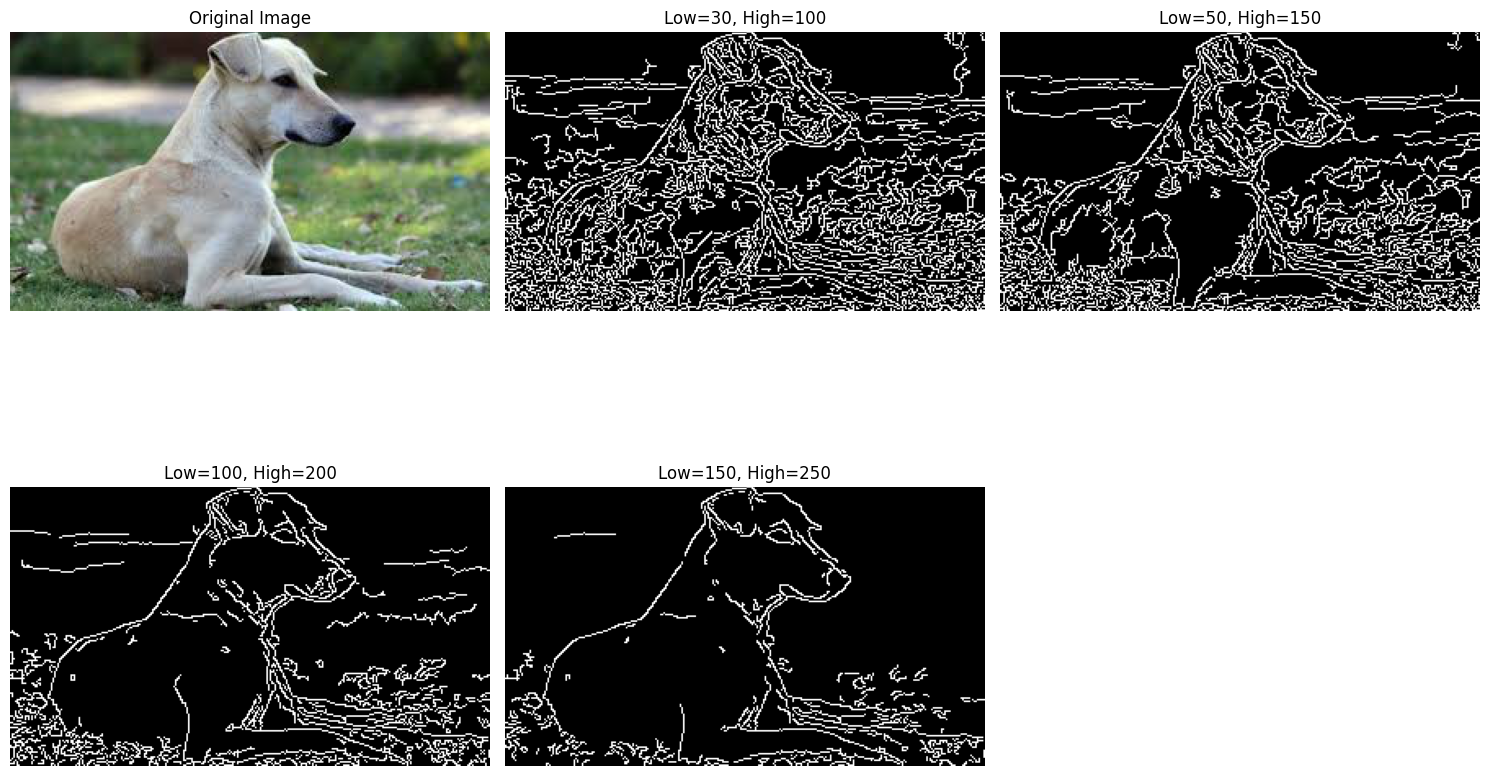

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "dog.jpg"
img_bgr = cv2.imread(image_path)

# Check if the image is loaded
if img_bgr is None:
    print("Error: Unable to load the image. Please check the path.")
else:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Define different pairs of thresholds
    thresholds = [
        (30, 100),   # Low sensitivity
        (50, 150),   # Moderate sensitivity
        (100, 200),  # High sensitivity
        (150, 250)   # Very high sensitivity
    ]

    # Plot results for different thresholds
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    for i, (low, high) in enumerate(thresholds, start=2):
        # Apply Canny edge detection
        edges = cv2.Canny(img_gray, low, high)

        # Plot the results
        plt.subplot(2, 3, i)
        plt.imshow(edges, cmap='gray')
        plt.title(f"Low={low}, High={high}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


In [8]:
#Compare the edges detected by Canny and Sobel methods on the same 
#image. 

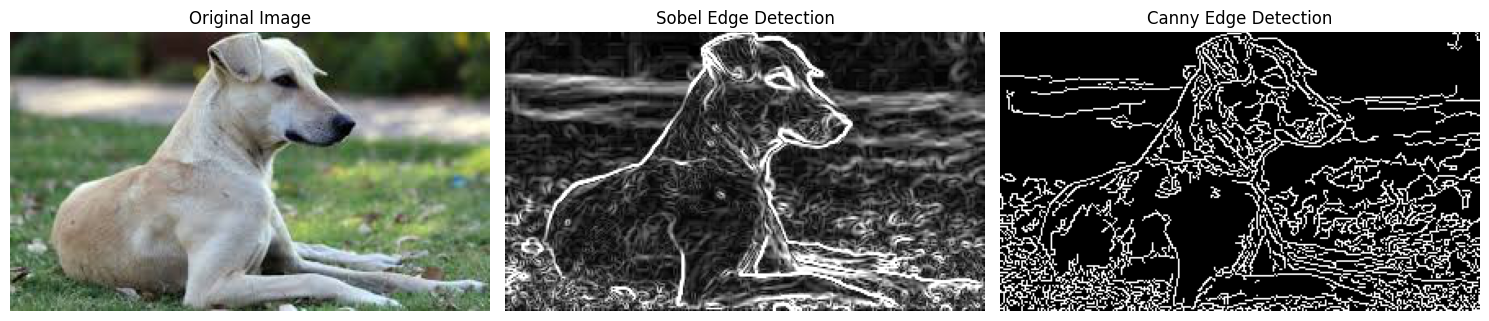

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "dog.jpg"
img_bgr = cv2.imread(image_path)

# Check if the image is loaded
if img_bgr is None:
    print("Error: Unable to load the image. Please check the path.")
else:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Sobel Edge Detection
    sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x-direction
    sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y-direction
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)          # Combine x and y gradients
    sobel_combined = cv2.convertScaleAbs(sobel_combined)      # Convert to 8-bit image

    # Canny Edge Detection
    canny_edges = cv2.Canny(img_gray, 50, 150)

    # Plot the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title("Sobel Edge Detection")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(canny_edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [10]:
#Write a program to compute second-order gradients using the Laplacian 
#operator. 

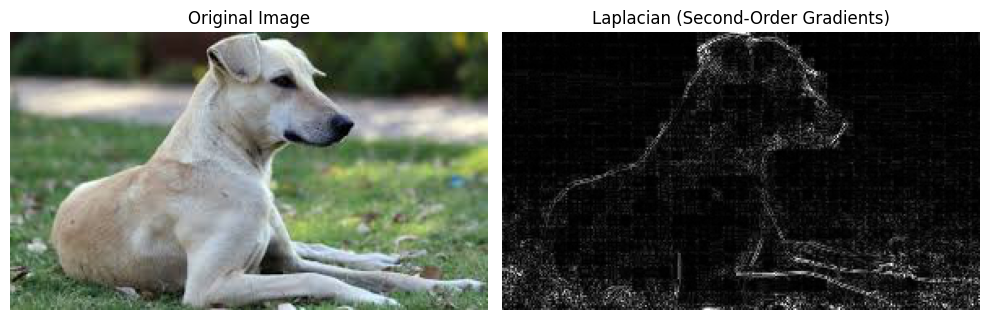

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "dog.jpg"
img_bgr = cv2.imread(image_path)

# Check if the image is loaded
if img_bgr is None:
    print("Error: Unable to load the image. Please check the path.")
else:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Apply the Laplacian operator
    laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)  # Compute second-order gradients
    laplacian_abs = cv2.convertScaleAbs(laplacian)   # Convert to 8-bit image for visualization

    # Plot the results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(laplacian_abs, cmap='gray')
    plt.title("Laplacian (Second-Order Gradients)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
